In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
df = pd.read_csv('IDEA_train.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,44.921192,45.614605,44.257927,45.192528,45.192528,5493852
1,2017-01-03,45.162380,45.494011,43.926292,44.257927,44.257927,6718645
2,2017-01-04,43.926292,45.102081,43.534363,44.710152,44.710152,8028185
3,2017-01-05,44.619705,45.343269,44.257927,45.102081,45.102081,8708757
4,2017-01-06,44.499111,45.162380,43.835846,43.956440,43.956440,8610986
...,...,...,...,...,...,...,...
1230,2021-12-24,13.850000,14.100000,13.400000,13.650000,13.650000,248366228
1231,2021-12-27,13.450000,13.750000,13.300000,13.450000,13.450000,133998036
1232,2021-12-28,13.550000,14.000000,13.500000,13.750000,13.750000,186304390
1233,2021-12-29,13.750000,14.800000,13.700000,14.450000,14.450000,348532953


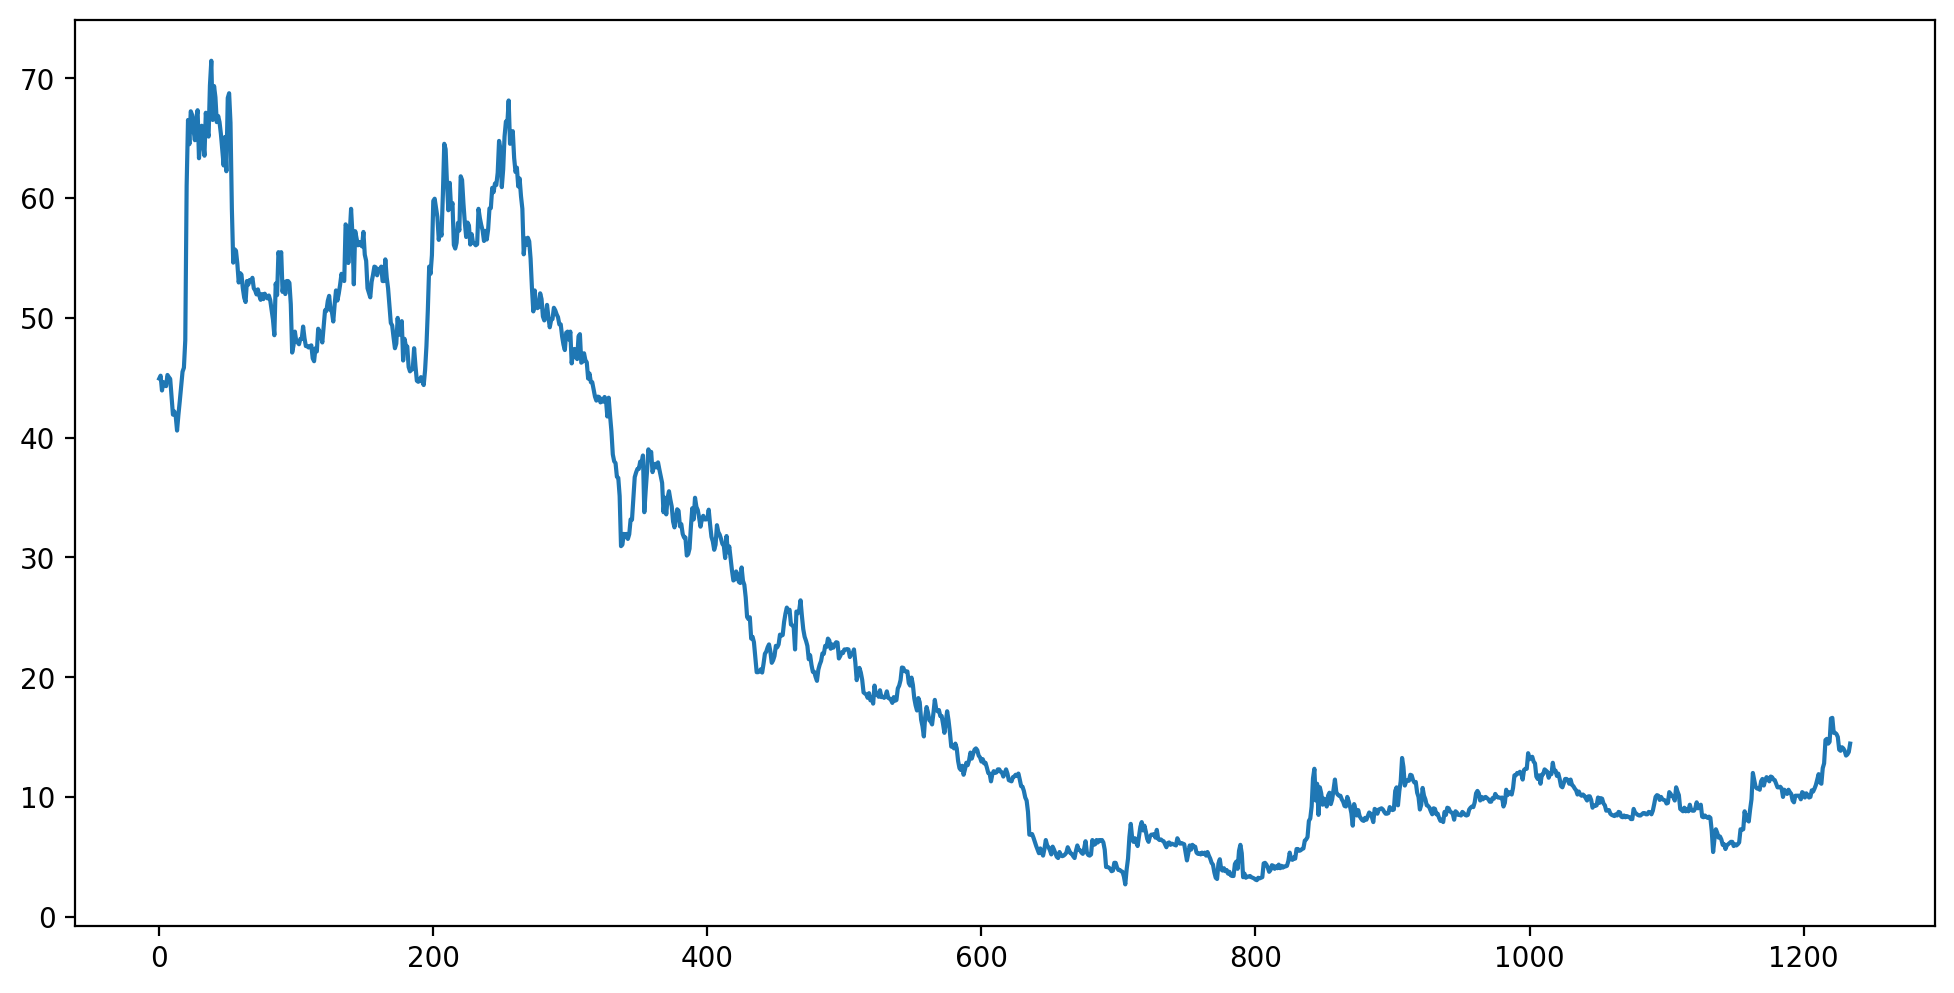

In [4]:
plt.figure(figsize=(12,6),dpi = 200)
plt.plot(df['Open'])

In [5]:
df = df['Open'].dropna()

In [6]:
len(df)

1235

In [7]:
x = np.array(df)
x

array([44.921192, 45.16238 , 43.926292, ..., 13.55    , 13.75    ,
       14.45    ])

In [8]:
x = x.reshape(-1,1)

In [9]:
x

array([[44.921192],
       [45.16238 ],
       [43.926292],
       ...,
       [13.55    ],
       [13.75    ],
       [14.45    ]])

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_x = sc.fit_transform(x)

In [11]:
scaled_x

array([[0.6141101 ],
       [0.6176182 ],
       [0.59963921],
       ...,
       [0.15781399],
       [0.160723  ],
       [0.17090455]])

In [12]:
X_train = []
y_train = []
timesteps = 180
for i in range(timesteps,len(df)):
    X_train.append(scaled_x[i-timesteps:i, 0])
    y_train.append(scaled_x[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train

array([[0.6141101 , 0.6176182 , 0.59963921, ..., 0.68383337, 0.63603568,
        0.66234635],
       [0.6176182 , 0.59963921, 0.60972495, ..., 0.63603568, 0.66234635,
        0.65357611],
       [0.59963921, 0.60972495, 0.6079709 , ..., 0.66234635, 0.65357611,
        0.6531376 ],
       ...,
       [0.10472449, 0.10399723, 0.09817921, ..., 0.16508652, 0.16217751,
        0.15635948],
       [0.10399723, 0.09817921, 0.09599745, ..., 0.16217751, 0.15635948,
        0.15781399],
       [0.09817921, 0.09599745, 0.08945217, ..., 0.15635948, 0.15781399,
        0.160723  ]])

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train

array([[[0.6141101 ],
        [0.6176182 ],
        [0.59963921],
        ...,
        [0.68383337],
        [0.63603568],
        [0.66234635]],

       [[0.6176182 ],
        [0.59963921],
        [0.60972495],
        ...,
        [0.63603568],
        [0.66234635],
        [0.65357611]],

       [[0.59963921],
        [0.60972495],
        [0.6079709 ],
        ...,
        [0.66234635],
        [0.65357611],
        [0.6531376 ]],

       ...,

       [[0.10472449],
        [0.10399723],
        [0.09817921],
        ...,
        [0.16508652],
        [0.16217751],
        [0.15635948]],

       [[0.10399723],
        [0.09817921],
        [0.09599745],
        ...,
        [0.16217751],
        [0.15635948],
        [0.15781399]],

       [[0.09817921],
        [0.09599745],
        [0.08945217],
        ...,
        [0.15635948],
        [0.15781399],
        [0.160723  ]]])

In [16]:
y_train

array([0.65357611, 0.6531376 , 0.62814244, ..., 0.15781399, 0.160723  ,
       0.17090455])

In [17]:
regressor = Sequential()

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(Dense(units = 1))

In [23]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
regressor.fit(X_train, y_train, epochs = 80, batch_size = 32)

Epoch 1/80
33/33 [==============================] - 13s 186ms/step - loss: 0.0160
Epoch 2/80
33/33 [==============================] - 6s 193ms/step - loss: 0.0040
Epoch 3/80
33/33 [==============================] - 6s 184ms/step - loss: 0.0034
Epoch 4/80
33/33 [==============================] - 6s 188ms/step - loss: 0.0031
Epoch 5/80
33/33 [==============================] - 6s 186ms/step - loss: 0.0031
Epoch 6/80
33/33 [==============================] - 6s 185ms/step - loss: 0.0033
Epoch 7/80
33/33 [==============================] - 6s 186ms/step - loss: 0.0024
Epoch 8/80
33/33 [==============================] - 6s 185ms/step - loss: 0.0025
Epoch 9/80
33/33 [==============================] - 6s 189ms/step - loss: 0.0025
Epoch 10/80
33/33 [==============================] - 6s 186ms/step - loss: 0.0026
Epoch 11/80
33/33 [==============================] - 6s 186ms/step - loss: 0.0023
Epoch 12/80
33/33 [==============================] - 6s 186ms/step - loss: 0.0024
Epoch 13/80
33/33 [=====

In [25]:
df_test = pd.read_csv('IDEA_test.csv')
real_openprice = df_test.iloc[:, 1:2].values

In [26]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,15.35,16.049999,15.25,15.55,15.55,392307918
1,2022-01-04,15.70,15.850000,15.10,15.25,15.25,286611986
2,2022-01-05,15.30,15.600000,15.05,15.10,15.10,251510189
3,2022-01-06,15.00,15.750000,14.90,15.30,15.30,304801531
4,2022-01-07,15.55,15.600000,15.00,15.10,15.10,256333161
...,...,...,...,...,...,...,...
95,2022-05-24,9.05,9.100000,8.85,9.00,9.00,120731587
96,2022-05-25,9.05,9.100000,8.65,8.75,8.75,94420521
97,2022-05-26,8.90,9.000000,8.40,8.60,8.60,175421842
98,2022-05-27,8.80,9.050000,8.75,8.90,8.90,133714106


In [27]:
pred_dataset = scaled_x
final_preds = []
for i in range(len(df),len(df)+len(df_test)):
    X_test = []
    X_test.append(pred_dataset[i-timesteps:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = regressor.predict(X_test)
    pred_dataset = np.append(pred_dataset,predicted_stock_price,axis=0)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    final_preds.append(predicted_stock_price[0])

1/1 [==============================] - 0s 33ms/step


In [28]:
if final_preds[0]<=final_preds[-1]:
    print("Upward trend")
else:
    print("Downward trend")

Downward trend


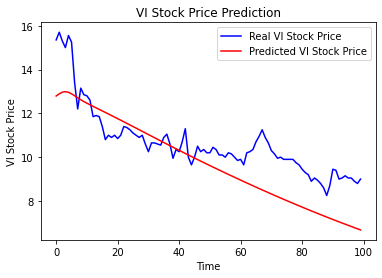

In [29]:
if((final_preds[0]<=final_preds[-1])&(real_openprice[0]<=real_openprice[-1])):
    plt.plot(real_openprice, color = 'blue', label = 'Real VI Stock Price')
    plt.plot(final_preds, color = 'green', label = 'Predicted VI Stock Price')
    plt.title('VI Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('VI Stock Price')
    plt.legend()
elif((final_preds[0]>final_preds[-1])&(real_openprice[0]>real_openprice[-1])):
    plt.plot(real_openprice, color = 'blue', label = 'Real VI Stock Price')
    plt.plot(final_preds, color = 'red', label = 'Predicted VI Stock Price')
    plt.title('VI Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('VI Stock Price')
    plt.legend()
else:
    plt.plot(real_openprice, color = 'blue', label = 'Real VI Stock Price')
    plt.plot(final_preds, color = 'black', label = 'Predicted VI Stock Price')
    plt.title('VI Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('VI Stock Price')
    plt.legend()